<a href="https://colab.research.google.com/github/Mohammed-Jemal/RandomForestAgorithm/blob/main/Health_care_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv("/content/Healthcare_Dataset.csv")

# Split features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy Score: 0.9382198952879581

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       900
           1       0.94      0.94      0.94      1010

    accuracy                           0.94      1910
   macro avg       0.94      0.94      0.94      1910
weighted avg       0.94      0.94      0.94      1910



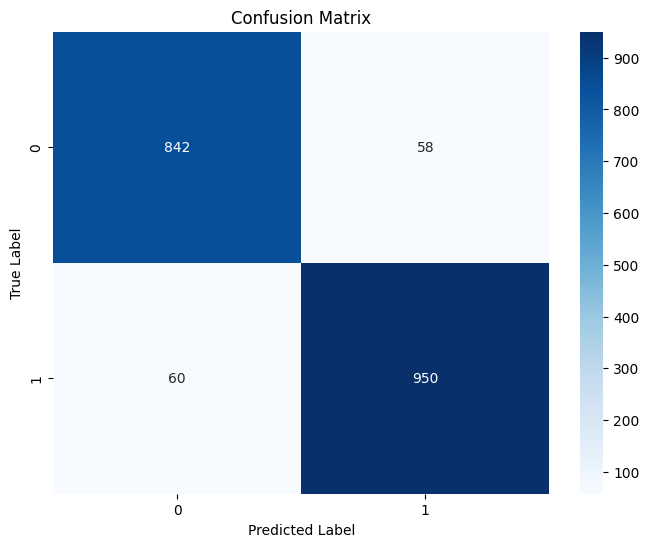

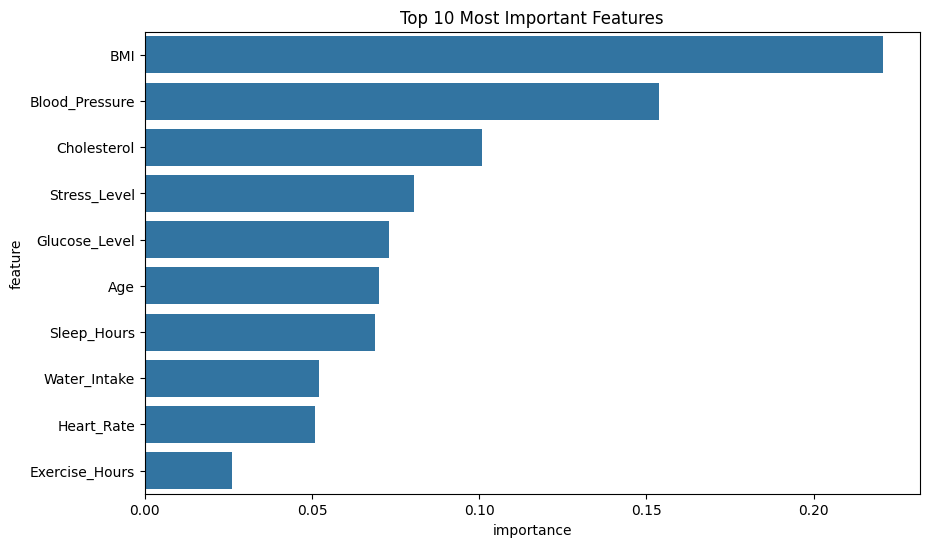

In [3]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize and train model with GridSearch
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best model
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)

# Print results
print('\nBest Parameters:', grid_search.best_params_)
print('\nAccuracy Score:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()




In [4]:
# Function for making predictions (useful for Streamlit)
def predict_health(input_data, model):
    """
    Make predictions on input data
    input_data: pandas DataFrame with same columns as training data
    model: trained random forest model
    """
    prediction = model.predict(input_data)
    probability = model.predict_proba(input_data)
    return prediction[0], probability[0]


In [5]:
# Save model and create example of usage
model_artifacts = {
    'model': best_rf_model,
    'feature_names': list(X.columns),
    'feature_importance': feature_importance
}
joblib.dump(model_artifacts, 'health_model.joblib')

# Example of loading and using the model
# loaded_artifacts = joblib.load('health_model.joblib')
# sample_input = X_test.iloc[0:1]  # Take first row as example
# prediction, probability = predict_health(sample_input, loaded_artifacts['model'])
# print(f'Prediction: {prediction}')
# print(f'Probability: {probability}')

['health_model.joblib']